In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.11.0


In [2]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
non_fraud = data[data['Class']==0]
fraud = data[data['Class']==1]
non_fraud.shape, fraud.shape


((284315, 31), (492, 31))

In [4]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [5]:
data = fraud.append(non_fraud, ignore_index=True)
data

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3488\96343452.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = fraud.append(non_fraud, ignore_index=True)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,39888.0,1.050731,-0.420129,0.646983,-0.056811,-0.584354,0.369985,-0.615422,0.340326,0.303879,...,0.201855,0.516437,0.002267,-0.229723,0.012712,1.111037,-0.044653,-0.000946,47.85,0
980,77913.0,-0.865326,-1.800069,1.089206,-1.912222,-2.752459,0.551164,1.096604,-0.093569,0.707806,...,-0.162342,-0.425485,0.992302,-0.177374,0.050425,-0.608395,0.100502,0.177097,498.77,0
981,151638.0,-0.184539,0.203067,1.119088,-0.366545,0.657023,1.658433,-0.277650,0.623094,0.100627,...,0.419093,1.505365,-0.030865,-1.337585,-1.225844,0.675017,0.272315,0.203037,1.02,0
982,136182.0,-0.764505,1.551702,-2.815613,-0.147824,1.440418,-1.609616,0.575553,0.569262,-0.988096,...,0.205198,0.353005,-0.214558,0.589283,-0.463491,0.477371,-0.240175,-0.073798,0.76,0


In [6]:
X = data.drop('Class', axis = 1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
X_train.shape, X_test.shape

((787, 30), (197, 30))

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
X_train.shape

(787, 30)

In [8]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_train.shape, X_test.shape

((787, 30, 1), (197, 30, 1))

# BUILD CNN

In [9]:
epochs = 20
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 batch_normalization (BatchN  (None, 29, 32)           128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 29, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 28, 64)            0

In [14]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
25/25 [==============================] - 2s 16ms/step - loss: 0.0580 - accuracy: 0.9759 - val_loss: 0.2549 - val_accuracy: 0.9239
Epoch 2/20
25/25 [==============================] - 0s 7ms/step - loss: 0.0592 - accuracy: 0.9746 - val_loss: 0.2545 - val_accuracy: 0.9239
Epoch 3/20
25/25 [==============================] - 0s 8ms/step - loss: 0.0628 - accuracy: 0.9746 - val_loss: 0.2548 - val_accuracy: 0.9239
Epoch 4/20
25/25 [==============================] - 0s 8ms/step - loss: 0.0618 - accuracy: 0.9733 - val_loss: 0.2470 - val_accuracy: 0.9239
Epoch 5/20
25/25 [==============================] - 0s 8ms/step - loss: 0.0799 - accuracy: 0.9720 - val_loss: 0.2432 - val_accuracy: 0.9289
Epoch 6/20
25/25 [==============================] - 0s 8ms/step - loss: 0.0787 - accuracy: 0.9708 - val_loss: 0.2374 - val_accuracy: 0.9289
Epoch 7/20
25/25 [==============================] - 0s 8ms/step - loss: 0.0724 - accuracy: 0.9708 - val_loss: 0.2331 - val_accuracy: 0.9289
Epoch 8/20
25/25 [=

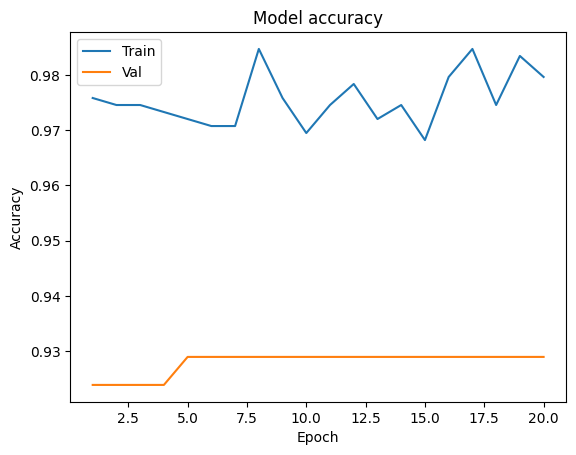

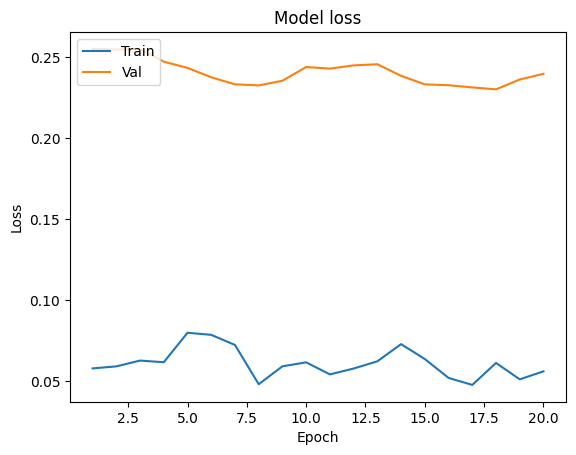

In [16]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()
plot_learningCurve(history, epochs)

Epoch 1/50
25/25 [==============================] - 2s 16ms/step - loss: 1.2104 - accuracy: 0.4752 - val_loss: 0.6363 - val_accuracy: 0.7056
Epoch 2/50
25/25 [==============================] - 0s 7ms/step - loss: 0.9113 - accuracy: 0.5794 - val_loss: 0.6190 - val_accuracy: 0.7614
Epoch 3/50
25/25 [==============================] - 0s 7ms/step - loss: 0.7335 - accuracy: 0.6442 - val_loss: 0.6048 - val_accuracy: 0.7107
Epoch 4/50
25/25 [==============================] - 0s 7ms/step - loss: 0.6345 - accuracy: 0.6963 - val_loss: 0.5884 - val_accuracy: 0.6802
Epoch 5/50
25/25 [==============================] - 0s 7ms/step - loss: 0.5791 - accuracy: 0.7230 - val_loss: 0.5692 - val_accuracy: 0.6853
Epoch 6/50
25/25 [==============================] - 0s 7ms/step - loss: 0.5041 - accuracy: 0.7687 - val_loss: 0.5493 - val_accuracy: 0.6904
Epoch 7/50
25/25 [==============================] - 0s 7ms/step - loss: 0.5096 - accuracy: 0.7751 - val_loss: 0.5279 - val_accuracy: 0.7310
Epoch 8/50
25/25 [=

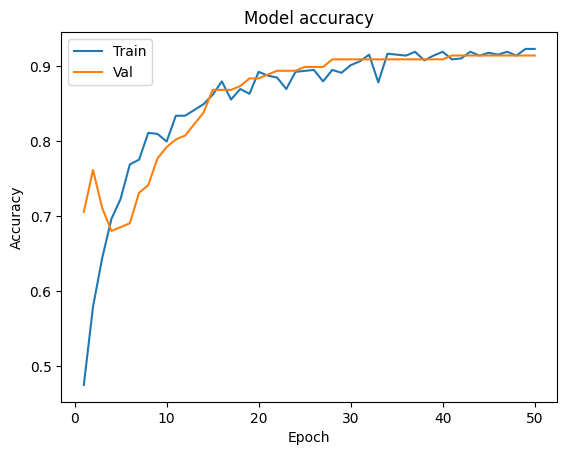

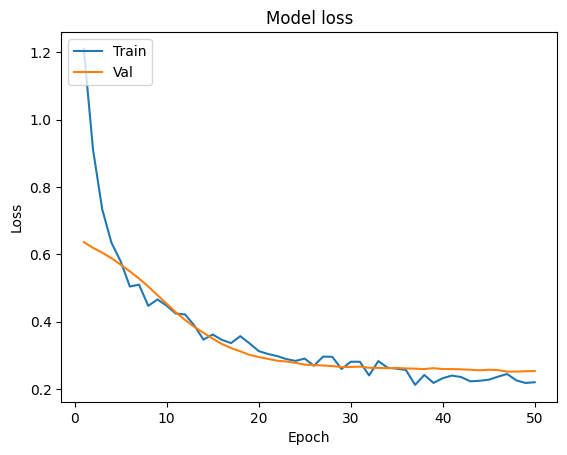

In [17]:
epochs = 50
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)
plot_learningCurve(history, epochs)